# <span style="color:#2c061f"> Macro 318: Lecture 4 - 6 / Tutorial 2 </span>  

<br>

## <span style="color:#374045"> Data, Stats and Math with Julia </span>


#### <span style="color:#374045"> Lecturer: </span> <span style="color:#d89216"> <br> Dawie van Lill (dvanlill@sun.ac.za) </span>

# Introduction

For this lecture you can focus on the mathematics and data manipulations. 

The code is there to help you better understand the math and statistics. 

You do not need to understand all of the code!

I will indicate which code components are important. 

In [2]:
# Packages
import Pkg

Pkg.add("CategoricalArrays")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("Downloads")
Pkg.add("ForwardDiff")
Pkg.add("GLM")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("RDatasets")
Pkg.add("Roots")
Pkg.add("ShiftedArrays")
Pkg.add("SparseArrays")
Pkg.add("Statistics")
Pkg.add("Symbolics")
Pkg.add("Zygote")

using CategoricalArrays
using CSV
using DataFrames
using DataFramesMeta
using Downloads
using ForwardDiff
using GLM
using LinearAlgebra
using Plots
using Random
using RDatasets
using Roots
using ShiftedArrays
using SparseArrays
using Statistics
using Symbolics
using Zygote

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
┌ Warning: The active manifest file at `/home/dawie/Dropbox/2022/318-macro/git/Macro-318/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
  No Changes to `~/Dropbox/2022/318-macro/git/Macro-318/Project.toml`
  No Changes to `~/Dropbox/2022/318-macro/git/Macro-318/Manifest.toml`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/dawie/Dropbox/2022/318-macro/git/Macro-318/Manifest.toml:0
   Resolving package versions...
  No Changes to `~/Dropbox/2022/318-macro/git/Macro-318/Project.toml`
  No Changes to `~/Dropbox/2022/318-macro/git/Macro-318/Manifest.to

In [3]:
ENV["LINES"] = 10; # set the max number of lines that will be printed
ENV["COLUMNS"] = 100; # set the max number of columns that will be printed

# Packages

In [ ]:
# Packages for this lecture

using CategoricalArrays
using CSV
using DataFrames
using DataFramesMeta
using Downloads
using ForwardDiff
using GLM
using LinearAlgebra
using Plots
using Random
using RDatasets
using Roots
using ShiftedArrays
using SparseArrays
using Statistics
using Symbolics
using Zygote

# DataFrames

In this section we discuss basic principles from the `DataFrames.jl` package. 

For the first topic we look at how to construct and access DataFrames. 

The fundamental object that we care about is the `DataFrame`. 

This is similar to a `dataframe` that you would find in R or in Pandas (Python).

DataFrames are essentially matrices, with the rows being observations and the columns indicating the variables. 

## Constructors

The easiest thing to construct is an empty DataFrame. 

In [4]:
DataFrame() # empty DataFrame

""
""


## Constructors

You could also construct a DataFrame with different keyword arguments. 

Notice the different types of the different columns. 

In [5]:
DataFrame(A = 2:5, B = randn(4), C = "Hello")

,A,B,C
,Int64,Float64,String
1,2,0.716393,Hello
2,3,-0.135105,Hello
3,4,-0.657844,Hello
4,5,0.924146,Hello


## Constructors

You can also create a DataFrame from a matrix, 

In [6]:
x = DataFrame(rand(3, 3), :auto) # automatically assign column names with :auto

,x1,x2,x3
,Float64,Float64,Float64
1,0.724487,0.778178,0.210157
2,0.205457,0.358746,0.288093
3,0.653048,0.885845,0.886389


## Accessing data

We will often work with **large** datasets in economics.

In [10]:
y = DataFrame(rand(1:100, 1000, 10), :auto)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,24,22,30,25,53,50,53,55,19,5
2,37,59,29,65,23,100,4,50,66,46
3,2,45,99,53,38,80,69,10,9,52
4,76,33,65,100,67,87,48,18,38,87
5,11,29,79,41,68,25,87,34,53,18
6,39,67,14,66,76,64,28,49,64,62
7,95,24,60,35,13,37,90,69,85,94
8,10,47,70,61,57,60,5,50,24,75
9,25,25,51,73,99,75,45,70,81,67


## Accessing data

We can look at the first few rows using the `first` function. 

In [11]:
first(y, 5) # first 5 rows

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,24,22,30,25,53,50,53,55,19,5
2,37,59,29,65,23,100,4,50,66,46
3,2,45,99,53,38,80,69,10,9,52
4,76,33,65,100,67,87,48,18,38,87
5,11,29,79,41,68,25,87,34,53,18


## Accessing data

There are multiple ways to access particular columns of the DataFrame.

The most obvious way is to to use `y.col`. 

Here `col` stands for the column name. 

This provides us the column in vector format.

## Accessing data

In [14]:
y.x2 # get a single column

1000-element Vector{Int64}:
 22
 59
 45
  ⋮
 51
 77

In [15]:
y[!, :x2] # or y[!, 2] or y[:, :x2]

1000-element Vector{Int64}:
 22
 59
 45
  ⋮
 51
 77

## Accessing data

You can access several columns as follows, 

In [17]:
y[:, [:x1, :x2]]

,x1,x2
,Int64,Int64
1,24,22
2,37,59
3,2,45
4,76,33
5,11,29
6,39,67
7,95,24
8,10,47
9,25,25


## Accessing data

Getting rows is also quite easy,

In [18]:
y[1, :]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,24,22,30,25,53,50,53,55,19,5


## Importing data

I have created a dataset that is hosted on GitHub.

Now let us download this data with Julia.

In [19]:
Downloads.download(
    "https://raw.githubusercontent.com/DawievLill/Macro-318/main/data/tut2_data.csv", 
    "tut2_data.csv"
)

"tut2_data.csv"

## Importing data

Next we read the CSV file into Julia and make it a DataFrame. 

In [20]:
sa_data = DataFrame(CSV.File("tut2_data.csv", dateformat = "yyyy/mm/dd")) # specify the date format

,date,gdp,repo,cpi,inflation
,Date,Int64,Float64,Float64,Float64
1,2004-03-31,1571580,8.0,51.1689,-2.05565
2,2004-06-30,1640953,8.0,51.4474,-2.02507
3,2004-09-30,1674699,7.66667,51.5677,-1.00851
4,2004-12-31,1731000,7.5,51.8483,1.62524
5,2005-03-31,1768828,7.5,52.1796,1.97509
6,2005-06-30,1803783,7.0,52.456,1.9603
7,2005-09-30,1873743,7.0,52.8125,2.41398
8,2005-12-31,1918423,7.0,52.9391,2.10385
9,2006-03-31,1960150,7.0,53.243,2.03793


## Plotting the data

For this example we are going to look at GDP.

GDP is the second column in the dataset. 

We can access GDP by calling the variable name.

However, we can also use the fact that it is located in the second column of the table. 

## Plotting the data

In [21]:
gdp = sa_data.gdp # or we could have done gdp = sa_data[!, 2]

71-element Vector{Int64}:
 1571580
 1640953
 1674699
       ⋮
 5632802
 5819983

In [22]:
date_sa = sa_data[!, :date] # we also want the date column for our plot

71-element Vector{Dates.Date}:
 2004-03-31
 2004-06-30
 2004-09-30
 ⋮
 2021-06-30
 2021-09-30

## Plotting the data

One popular transformation of GDP data is to take a natural logarithm.

The reason for this is that differences between adjacent values in the GDP series represent growth rates once the series is "logged".

We will get back to this point at a later stage. 

## Plotting the data (Log GDP)

If we take a natural log of the series then the plot of GDP looks as follows. 

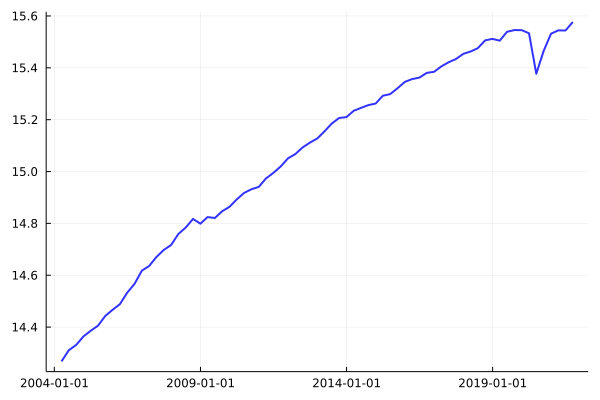

In [27]:
plot(date_sa, log.(gdp), legend = false, lw = 2, color = :blue, alpha = 0.8)

## Plotting the data (inflation)

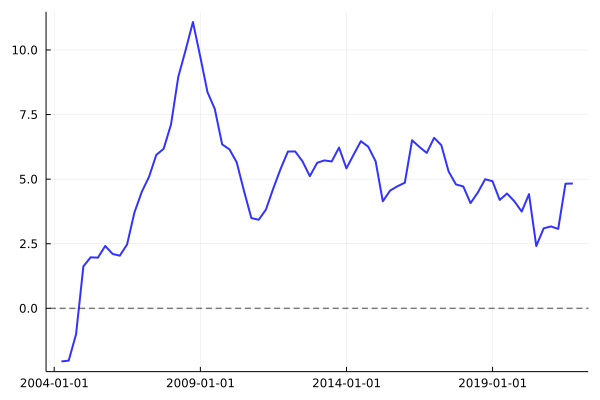

In [43]:
inflation = sa_data[!, :inflation]
plot(date_sa, inflation, legend = false, lw = 2, color = :blue, alpha = 0.8)
plot!([0], legend = false, lw = 1.5, seriestype = :hline, color = :black, ls = :dash, alpha = 0.5)

## Plotting the data (inflation vs repo)

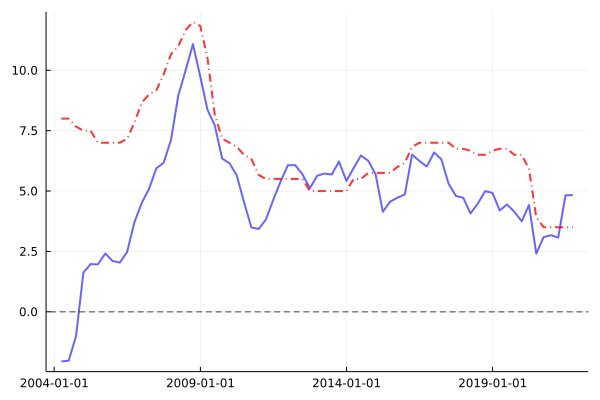

In [52]:
repo = sa_data[!, :repo]
plot(date_sa, inflation, legend = false, lw = 2, color = :blue, alpha = 0.6)
plot!(date_sa, repo, legend = false, lw = 2, color = :red, alpha = 0.8, ls = :dashdot)
plot!([0], legend = false, lw = 1.5, seriestype = :hline, color = :black, ls = :dash, alpha = 0.5)

# Descriptive statistics

In [28]:
mean(gdp) # The average

3.7277526338028167e6

In [37]:
std(gdp) # The standard deviation

1.3124105578634653e6

In [36]:
describe(sa_data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,date,,2004-03-31,2012-12-31,2021-09-30,0,Date
2,gdp,3.72775e6,1571580,3.71359e6,5819983,0,Int64
3,repo,6.73709,3.5,6.66667,12.0,0,Float64
4,cpi,82.2662,51.1689,80.0,122.233,0,Float64
5,inflation,4.83013,-2.05565,4.86163,11.0829,0,Float64


# Histogram

Histogram gives general idea of what the distribution for **inflation** looks like,

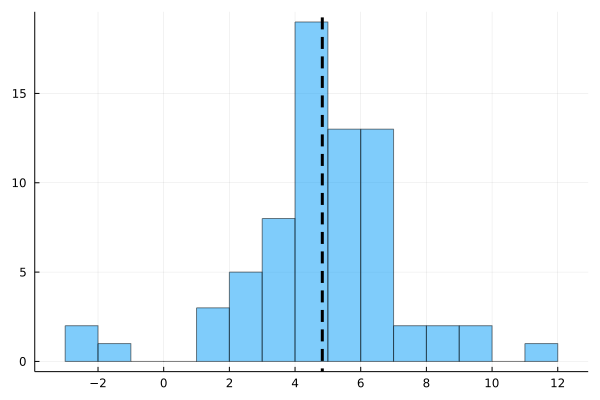

In [41]:
histogram(inflation, legend = false, alpha = 0.5, bins = 20)
plot!([mean(inflation)],  seriestype = :vline, lw = 3, colour = :black, ls = :dash) # plots the mean value

## Growth rates

Computing growth rates is quite important in macroeconomics. 

This is something that you will frequently encounter. 

The growth rate between subsequent two dates can be calculated as follows, 

$$
\left(\frac{Y_{t} - Y_{t-1}}{Y_{t-1}}\right) \times 100 = \left(\frac{Y_{t}}{Y_{t-1}} - 1\right) \times 100 
$$


## Growth rates

The growth rate from one quarter to the same quarter next year is, 

$$
\left(\frac{Y_{t}}{Y_{t-4}} - 1\right) \times 100 
$$

For monthly or quarterly growth rates at an annual rate, 

$$
\left(\left[\frac{Y_{t}}{Y_{t-1}}\right]^{n} - 1\right) \times 100 
$$

where $n = 4$ represents quarterly growth and $n = 12$ gives monthly growth. 

## Growth rates

Let us try calculating some growth rates with the data at hand.

We will focus on GDP growth rates for this example, 

In [53]:
gdp_first = sa_data[1, :gdp]; # first value of the GDP series
gdp_second = sa_data[2, :gdp]; # second value of the GDP series

gdp_growth_1 = ((gdp_second - gdp_first)/gdp_first) * 100 # using the formula for growth between two periods. 

4.414220084246427

## Growth rates

There is an alternative way to calculate an approximation to the growth rate.

We can simply take the natural logarithm of the two values and subtract them from each other. 

In other words we have that, 

$$
\left(\frac{Y_{t}}{Y_{t-1}} - 1\right) \times 100 \approx \log(Y_{t}) - \log(Y_{t-1}) \times 100
$$

In [54]:
(log(gdp_second) - log(gdp_first)) * 100

4.319568788852912

## Functions

A function is a **rule** that assigns to every element of $x \in X$ a **single element** of the set $Y$. 

This is written as, 

$$
f:X \rightarrow Y
$$

When we write $y = f(x)$ we are mapping from the argument $x$ in the domain $X$ to a value in the co-domain $Y$. 

It is important to note that for a function we are assigning a single element from the set $X$ to the set $Y$.

## Functions and non-functions

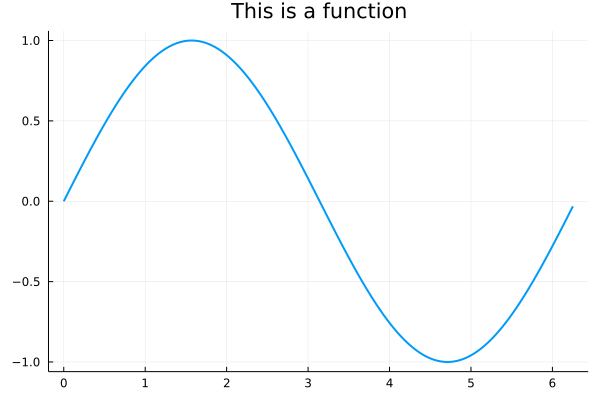

In [55]:
x = 0:π/100:2π
y = sin.(x)

plot(x, y, title = "This is a function", legend = false, lw = 2)

## Functions and non-functions

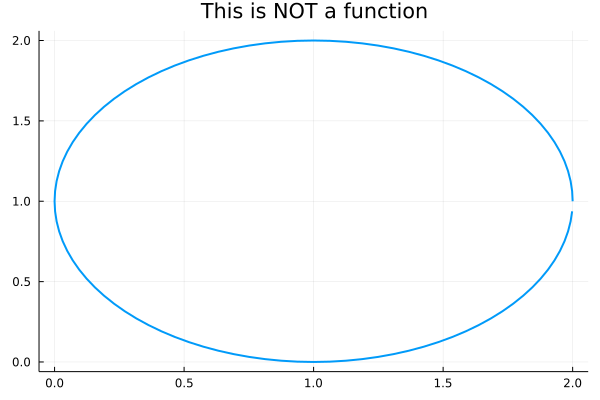

In [57]:
x = 1; y = 1; r = 1
θ = 0:π/50:2π
x_unit = r .* cos.(θ) .+ x
y_unit = r .* sin.(θ) .+ y
plot(x_unit, y_unit, title = "This is NOT a function", legend = false, lw = 2)

## Linear function

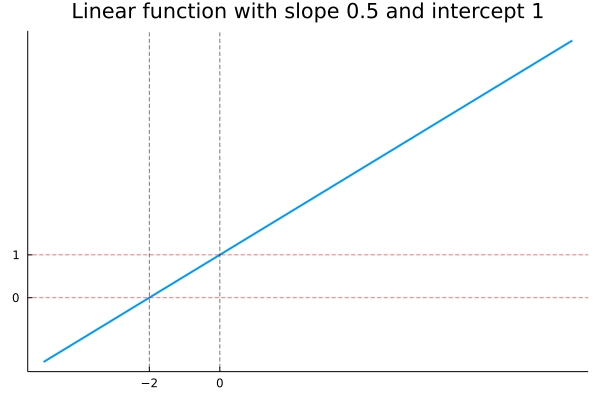

In [66]:
m = 0.5; b = 1;
ar_x = LinRange(-5, 10, 100); ar_y = ar_x .* m .+ b;
plot(ar_x, ar_y, legend = false, title = "Linear function with slope $m and intercept $b", lw = 2)
vline!([0, -2], ls = :dash, color = :black, alpha = 0.5, xticks = ([0, -2]))
hline!([0, 1], ls = :dash, color = :red, alpha = 0.5, yticks = ([0, 1]))